# Project1

# 1: Business Understanding and Goal
Udacity Data Scientist Nanodegree capstone project 1 - a data science blogpost

This project focuses on the Google Play Store dataset, aiming to
understand and predict app ratings based on various features. The findings can be valuable to app developers and stakeholders seeking to understand factors that contribute to positive user ratings and app success.

# Key steps include:
1. **Data Preparation**: Cleaning the dataset by handling missing values, converting data types, and removing duplicates.
2. **Exploratory Data Analysis:** Investigating app categories, ratings, pricing, and other features to understand their distributions and relationships.
3. **Feature Engineering:** Transforming existing features and creating new ones to enhance the predictive power of models.
4. **Machine Learning:** Training Linear Regression and Random Forest models to predict app ratings based on selected features.
5. **Insights:** Identifying important factors that influence app ratings and drawing conclusions based on the analysis.



---


# What I Wanted to Know
Before beginning our analysis, I tried to answer four key questions:

## Questions:
1. What are the most common app categories in the Google Play Store?
2. What is the distribution of app ratings?
3. Which features are most important in predicting app ratings?
4. What are the top 10 app genres in the Google Play Store?


In [121]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('Libraries are loaded')

Libraries are loaded


#2: Data Loading and Cleaning

In [122]:
# Load the data
playstore = pd.read_csv('/content/googleplaystore.csv')

playstore.head()

playstore.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [123]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [124]:
# Create a function to convert value to numeric

def convert_to_numeric(value):
    try:
        return int(value)
    except:

        value = value.replace(',','')

        if value[-1] == 'M':
            return int(float(value[:-1])*1000000)
        elif value[-1] == 'k':
            return int(float(value[:-1])*1000)
        elif value[-1] == '+':
            return int(float(value[:-1]))
        elif value == "Varies with device":
            return float('NaN')
        else:
            raise ValueError(value)

This resusable function converts differnt formats to numerical data.

In [125]:
# Check for missing values and store in variable
playstore.isnull().sum()


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [126]:
# Check for duplicate values
duplicates = playstore.duplicated().sum()

Handling missing data

In [127]:
# Remove rows with 'Everyone' in the 'Price' column
playstore = playstore[playstore['Price'] != 'Everyone']

In [128]:
# Fill missing values

# Filling missing rating value by median() value
playstore.dropna(subset=['Rating'], inplace=True)
# playstore['Rating'].fillna(playstore['Rating'].median(), inplace=True)

# Filling missing type
playstore['Type'].fillna(playstore['Type'].mode()[0], inplace=True)

# Filling missing value with most frequent version
playstore['Current Ver'].fillna(playstore['Current Ver'].mode()[0], inplace=True)

# playstore - Content Rating

# Filling missing value with min required Andriod version
playstore['Android Ver'].fillna(playstore['Android Ver'].mode()[0], inplace=True)

# Check if all missing values have been filled
playstore.isnull().sum()

<ipython-input-128-8e8dd1ec264d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore.dropna(subset=['Rating'], inplace=True)
<ipython-input-128-8e8dd1ec264d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playstore['Type'].fillna(playstore['Type'].mode()[0], inplace=True)
<ipython-input-128-8e8dd1ec264d>:8: SettingWithCopyWarning: 
A 

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [129]:
# Remove duplicate values
playstore.drop_duplicates(inplace=True)

# Check if all duplicates
playstore.duplicated().sum()

<ipython-input-129-20b64d0fcd3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore.drop_duplicates(inplace=True)


0

In [130]:
# Convert 'Reviews' and 'Installs' columns to numeric
playstore['Reviews'] = playstore['Reviews'].apply(convert_to_numeric)
playstore['Installs'] = playstore['Installs'].apply(convert_to_numeric)
playstore['Size'] = playstore['Size'].apply(convert_to_numeric)


<ipython-input-130-decb37156dcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore['Reviews'] = playstore['Reviews'].apply(convert_to_numeric)
<ipython-input-130-decb37156dcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore['Installs'] = playstore['Installs'].apply(convert_to_numeric)
<ipython-input-130-decb37156dcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [131]:
# Filling missing value with most frequent version
playstore['Size'].fillna(playstore['Size'].mean(), inplace=True)


<ipython-input-131-e516500a05af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  playstore['Size'].fillna(playstore['Size'].mean(), inplace=True)
<ipython-input-131-e516500a05af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore['Size'].fillna(playstore['Size'].mean(), inplace=True)


In [132]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            8892 non-null   float64
 5   Installs        8892 non-null   int64  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 972.6+ KB


In [133]:
# Summary statistics
playstore.describe()

,Rating,Reviews,Size,Installs
count,8892.000000,8.892000e+03,8.892000e+03,8.892000e+03
mean,4.187877,4.727764e+05,2.274762e+07,1.648965e+07
std,0.522377,2.905052e+06,2.141290e+07,8.637600e+07
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00
25%,4.000000,1.640000e+02,6.300000e+06,1.000000e+04
50%,4.300000,4.714500e+03,2.000000e+07,5.000000e+05
75%,4.500000,7.126675e+04,2.700000e+07,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09


#3: Exploratory Data Analysis (EDA)

### 1. What are the most common app categories in the Google Play Store?

Our analysis shows that three main categories dominate the app marketplace.

*   Family
*   Games
*   Tools

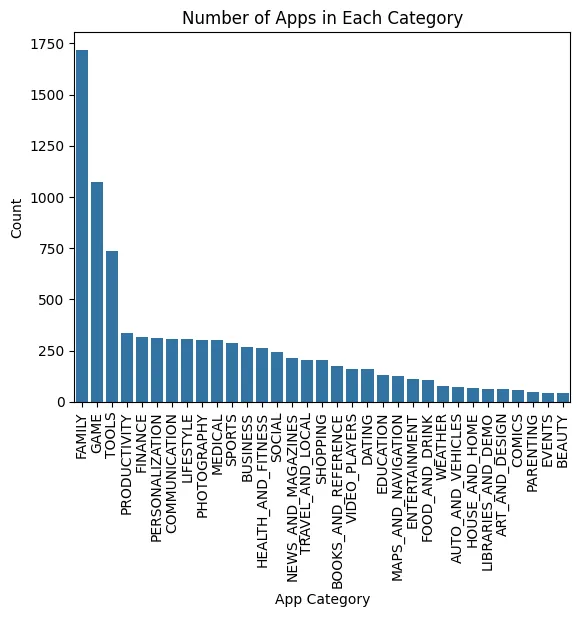





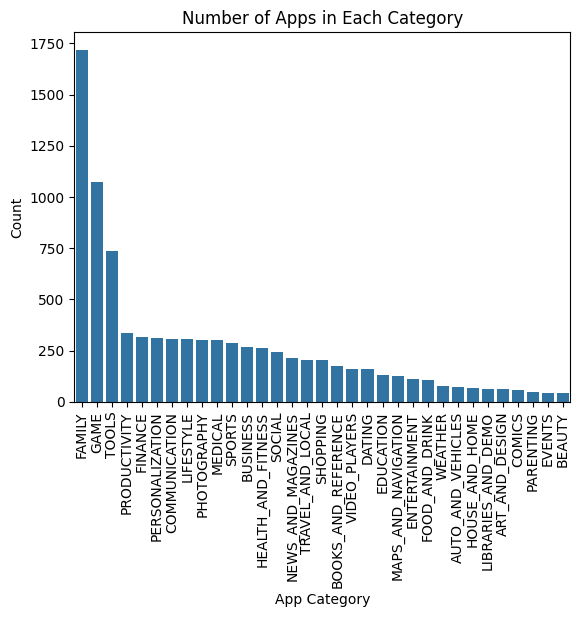

In [134]:
# Create a Barplot to visualize number of apps in each category
category_counts = playstore['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Count')
plt.title('Number of Apps in Each Category')
plt.show()

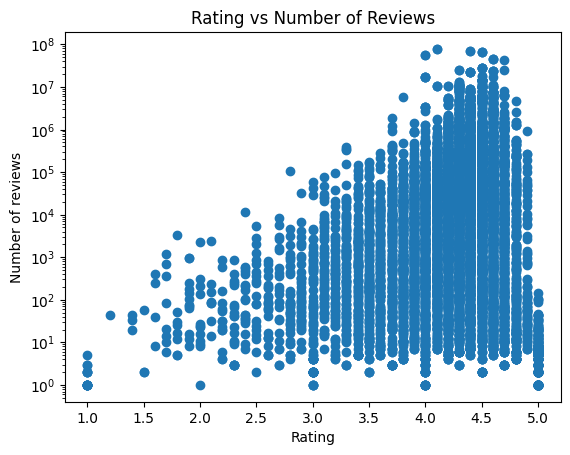

In [135]:
# Create Scatter Plot vs Reviews

playstore['Reviews'].dtype

#plt.scatter(playstore['Rating'], playstore['Reviews'])
plt.scatter(playstore[playstore.Rating < 17.5].Rating, playstore[playstore.Rating < 17.5].Reviews)
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.title('Rating vs Number of Reviews')
plt.show()

# sns.scatterplot(data=None, *, x=None, y=Non)

### 2. What is the distribution of app ratings across the Play Store?

Most apps on the Google Play Store have ratings between 4.0 and 4.5.

This suggests that users are generally satisfied with the quality of apps available, though there’s still room for improvement.

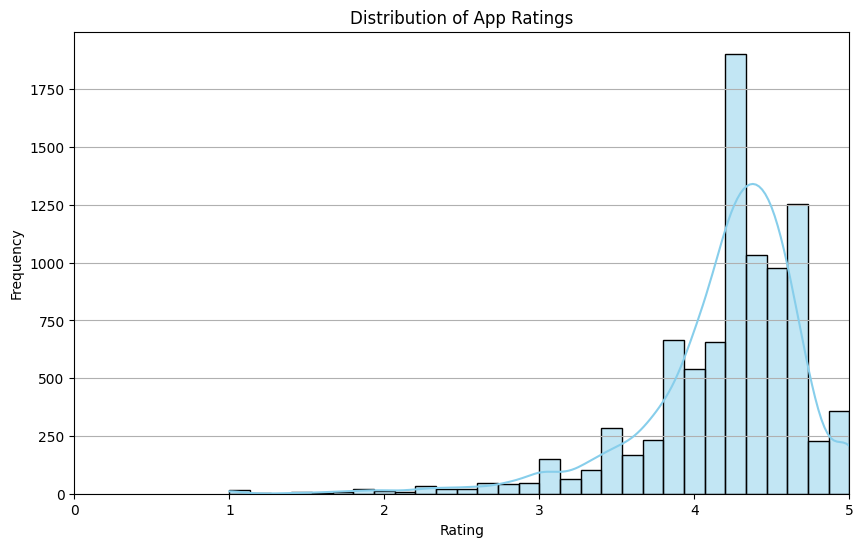

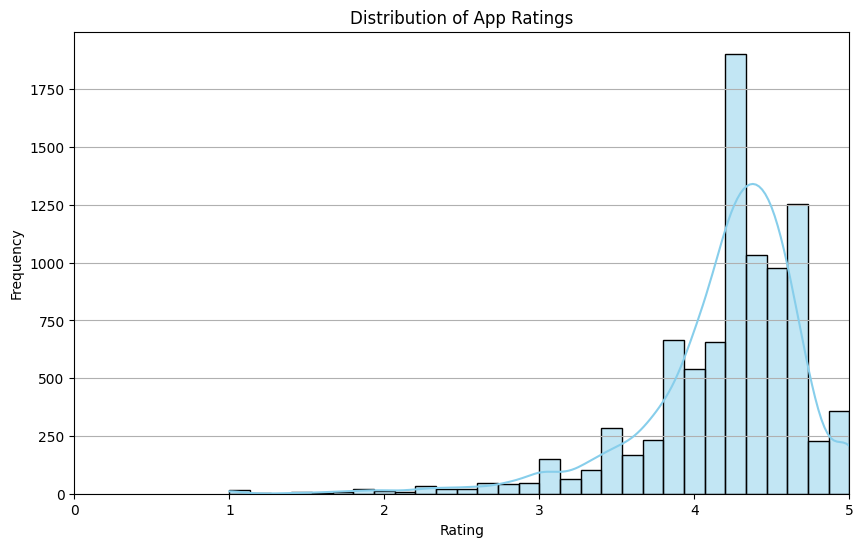

In [136]:
# Visualization of Distribution of App Ratings
plt.figure(figsize=(10,6))
sns.histplot(playstore['Rating'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim([0, 5])
plt.grid(axis='y')

plt.show()

Most apps have a rating between 4.0 and 4.5

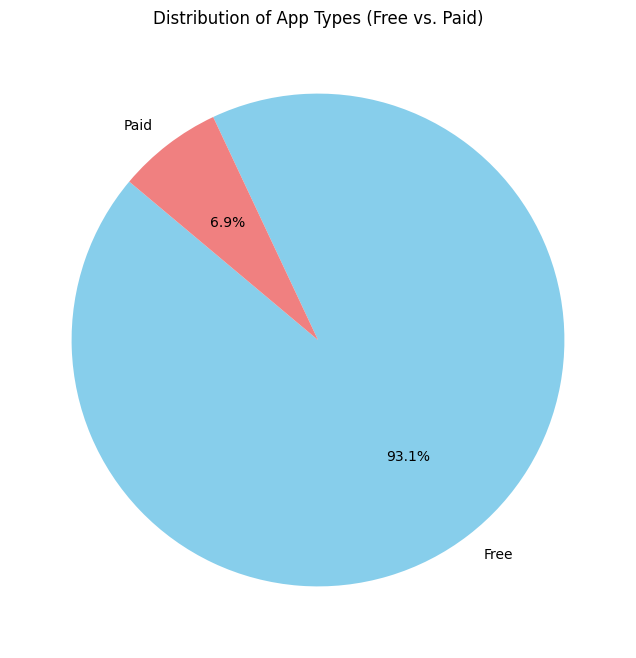

In [137]:
# Visualization of Distribution of App Types (Free vs. Paid)
type_counts = playstore['Type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of App Types (Free vs. Paid)')
plt.show()

A vast majority (approximately 92.6%) of the apps in the dataset are free.
Only about 7.4% of the apps are paid.

### 3. What are the top genres capturing user interest?

Diving deeper than broad categories, the analysis focuses on specific genres that capture the most user interest. The top 10 are **Tools**, **Entertainment**, **Education**, **Business**, **Lifestyle, Productivity, Finance, Action, Personalization, and Communication**.
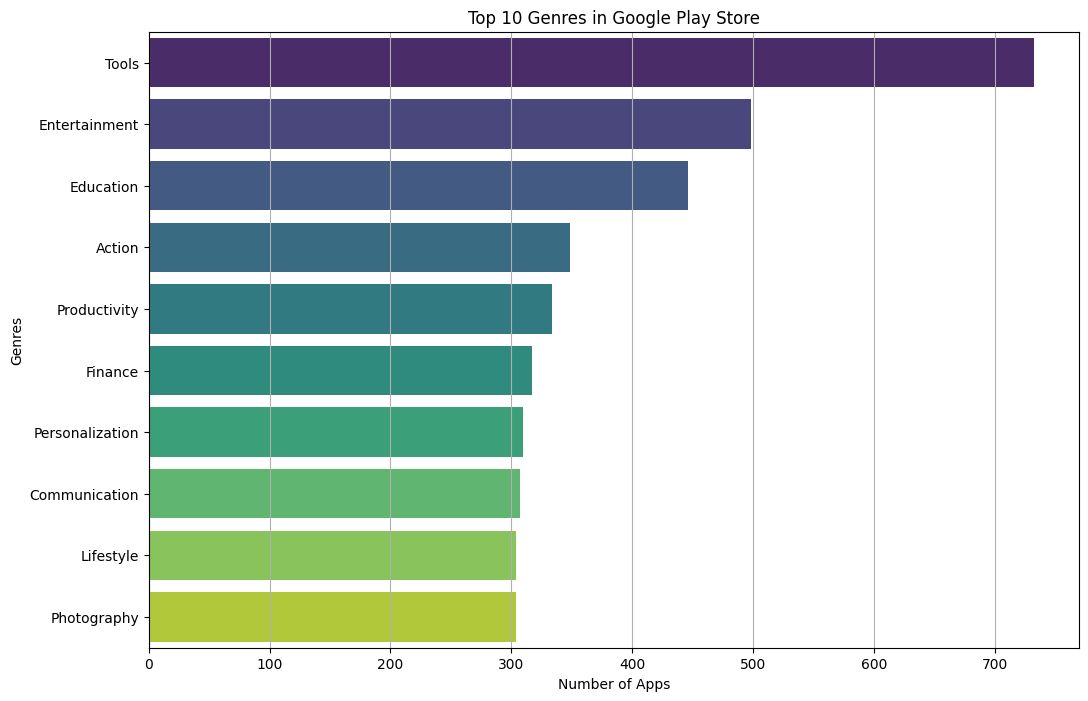


<ipython-input-138-db71845401ec>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


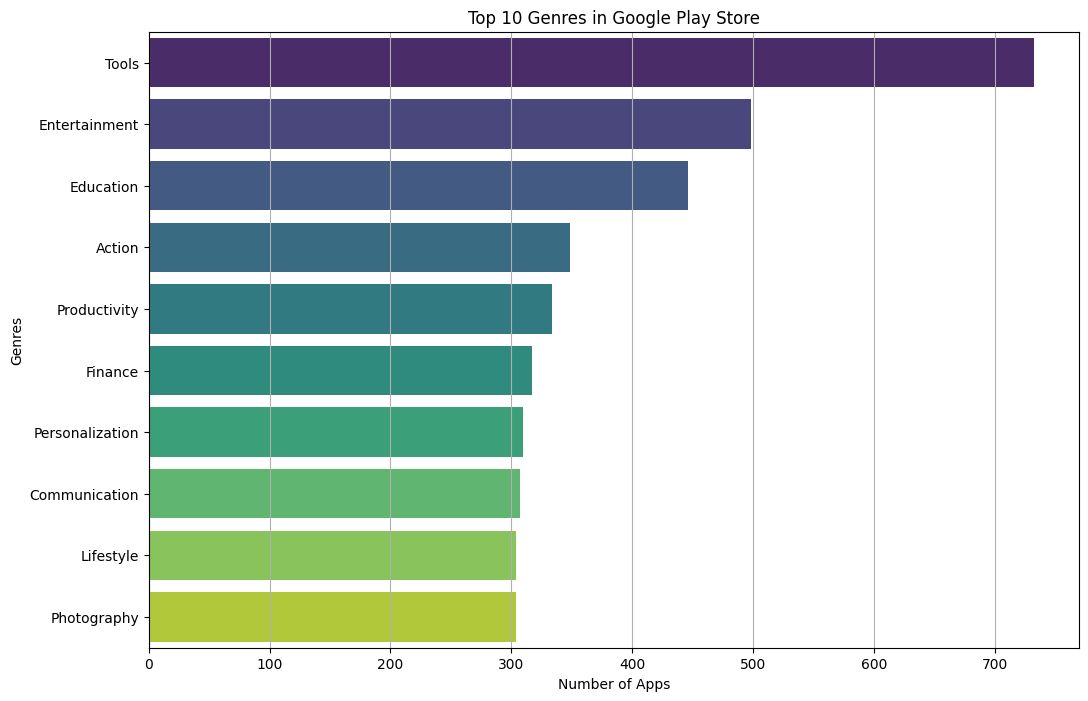

In [138]:
# Visualization of Top 10 Genres

# Top 10 genres
top_genres = playstore['Genres'].value_counts().head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres in Google Play Store')
plt.xlabel('Number of Apps')
plt.ylabel('Genres')
plt.grid(axis='x')

plt.show()

<ipython-input-139-92b1dd3f8901>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_Cat.values, y=top_Cat.index, palette='viridis')


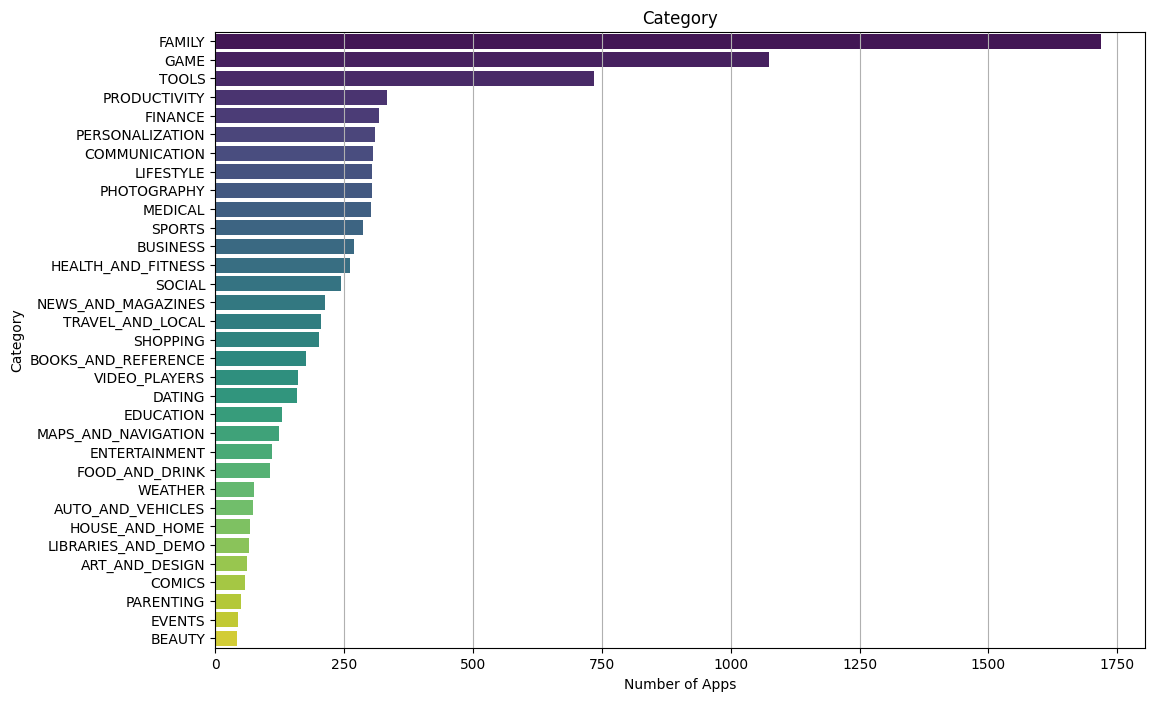

In [139]:
top_Cat = playstore['Category'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=top_Cat.values, y=top_Cat.index, palette='viridis')
plt.title('Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.grid(axis='x')

plt.show()

In [140]:
# Identify non-numeric values in the 'Price' column
non_numeric_prices = playstore['Price'][~playstore['Price'].str.replace('$', '', regex=True).str.isnumeric()]
non_numeric_prices.unique()

array(['$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [141]:
# collapsing less frequent categories in the category column
playstore_counts = playstore['Category'].value_counts(ascending=False)
cats_to_collapse = playstore_counts.index[3:]
playstore.loc[(playstore['Category'].isin(cats_to_collapse)), 'Category'] = 'other'


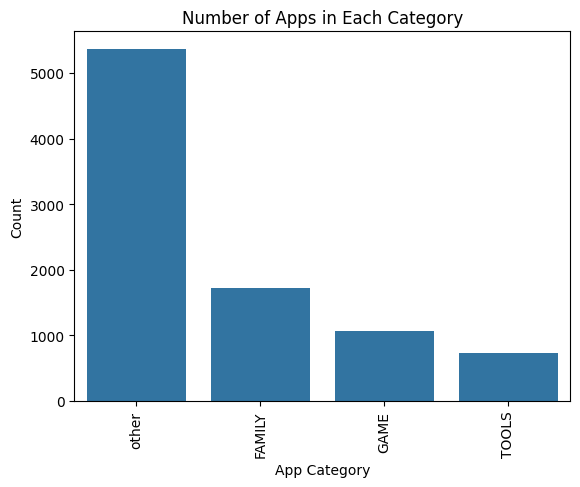

In [142]:
#
category_counts = playstore['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Count')
plt.title('Number of Apps in Each Category')
plt.show()

In [143]:
# Convert price to float
def convert_price_to_float(price):
    if isinstance(price, str):
        return float(price.replace('$', ''))
    else:
        return price

playstore['Price'] = playstore['Price'].apply(convert_price_to_float)


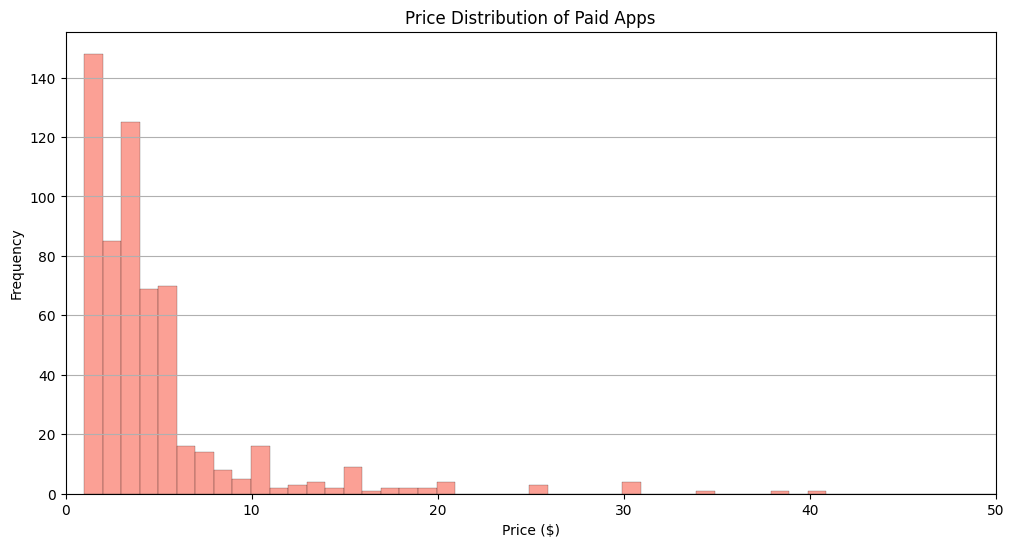

In [144]:
# Filter out free apps to focus on paid apps
paid_apps = playstore[playstore['Type'] == 'Paid']

# Visualization of Price Distribution of Paid Apps
plt.figure(figsize=(12,6))
sns.histplot(paid_apps['Price'], bins=400, color='salmon')
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim([0, 50])
plt.grid(axis='y')

plt.show()


In [145]:
# Inspect the first rows again before adding ML model
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,other,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,other,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",other,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,other,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,other,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#4: Feature Engineering & Model Building

In [146]:
playstore['Type'].value_counts()
playstore['Content Rating'].value_counts()

# Drop Adults only 18+ and Unrated
playstore[playstore['Content Rating'].isin(['Adults only 18+', 'Unrated']) == False]
playstore = playstore[playstore['Content Rating'].isin(['Adults only 18+', 'Unrated']) == False]


** Machine Learning: **
Predicting App Ratings -> Given features like the number of installs, reviews, genre and category. Is it possible to predict rating of an app?


In [147]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = playstore.drop('Rating', axis=1)
y = playstore['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7110, 12), (1778, 12), (7110,), (1778,))

In [148]:
# One-hot encode the categorical columns
categorical_columns = ['Category', 'Type', 'Content Rating']
ohe_train = pd.get_dummies(X_train[categorical_columns], columns=categorical_columns, drop_first=True).reset_index(drop = True)
ohe_test = pd.get_dummies(X_test[categorical_columns], columns=categorical_columns, drop_first=True).reset_index(drop = True)

numerical_columns = ['Size', 'Price', 'Reviews', 'Installs']

# Display the first few rows of the encoded dataframe
ohe_train.head()


,Category_GAME,Category_TOOLS,Category_other,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False


In [149]:
ohe_test.head()

,Category_GAME,Category_TOOLS,Category_other,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,False,False,True,False,True,False,False
1,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False


In [150]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_train = X_train[numerical_columns]
numerical_test = X_test[numerical_columns]

numerica_train_df = pd.DataFrame(scaler.fit_transform(numerical_train), columns = numerical_train.columns).reset_index(drop = True)

numerica_test_df = pd.DataFrame(scaler.transform(numerical_test), columns = numerical_test.columns).reset_index(drop = True)
numerica_test_df

,Size,Price,Reviews,Installs
0,-0.845953,-0.061909,-0.139627,-0.180533
1,-0.911135,-0.061909,-0.163748,-0.190791
2,-0.929758,-0.061909,-0.166249,-0.190791
3,-0.001025,-0.061909,1.287167,0.377927
4,1.826509,-0.061909,-0.119868,-0.077959
...,...,...,...,...
1773,-0.701621,-0.061909,-0.166623,-0.191925
1774,-0.762147,-0.061909,-0.153142,-0.077959
1775,-0.813362,-0.061909,-0.166625,-0.191929
1776,-0.766803,-0.061909,-0.166586,-0.191816


In [151]:
X_train_tr = pd.concat([numerica_train_df, ohe_train], axis=1)
X_test_tr = pd.concat([numerica_test_df, ohe_test], axis=1)

X_train_tr


,Size,Price,Reviews,Installs,Category_GAME,Category_TOOLS,Category_other,Type_Paid,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,-1.042663,-0.061909,-0.166599,-0.191816,False,True,False,False,False,False,False
1,-0.766803,-0.061909,-0.134518,-0.134945,False,True,False,False,False,False,False
2,-0.925102,-0.061909,-0.166583,-0.191816,False,True,False,False,False,False,False
3,-0.001025,-0.061909,-0.165539,-0.190791,False,False,True,False,False,False,False
4,-0.766803,-0.061909,-0.166626,-0.191925,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7105,-1.042756,-0.061909,-0.161111,-0.134945,False,True,False,False,False,False,False
7106,-0.906479,-0.061909,-0.166616,-0.191816,False,True,False,False,False,False,False
7107,-0.001025,-0.061909,0.200338,0.377927,False,False,True,False,False,False,False
7108,-0.001025,-0.061909,-0.117904,-0.134945,False,False,True,False,False,False,False


In [152]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8888 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8888 non-null   object 
 1   Category        8888 non-null   object 
 2   Rating          8888 non-null   float64
 3   Reviews         8888 non-null   int64  
 4   Size            8888 non-null   float64
 5   Installs        8888 non-null   int64  
 6   Type            8888 non-null   object 
 7   Price           8888 non-null   float64
 8   Content Rating  8888 non-null   object 
 9   Genres          8888 non-null   object 
 10  Last Updated    8888 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8888 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 972.1+ KB


#6: Evaluation

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_tr, y_train)

# Predict the ratings on the test set
y_pred = model.predict(X_test_tr)

# Calculate R-squared for training data
print("R-squared for training data:")
print(model.score(X_train_tr, y_train))

# # Calculate R-squared for testing data
print("R-squared for test data:")
print(model.score(X_test_tr, y_test))

print(mean_absolute_error(y_pred, y_test))


R-squared for training data:
0.020382373448629587
R-squared for test data:
0.016455174028271013
0.3587111150675365


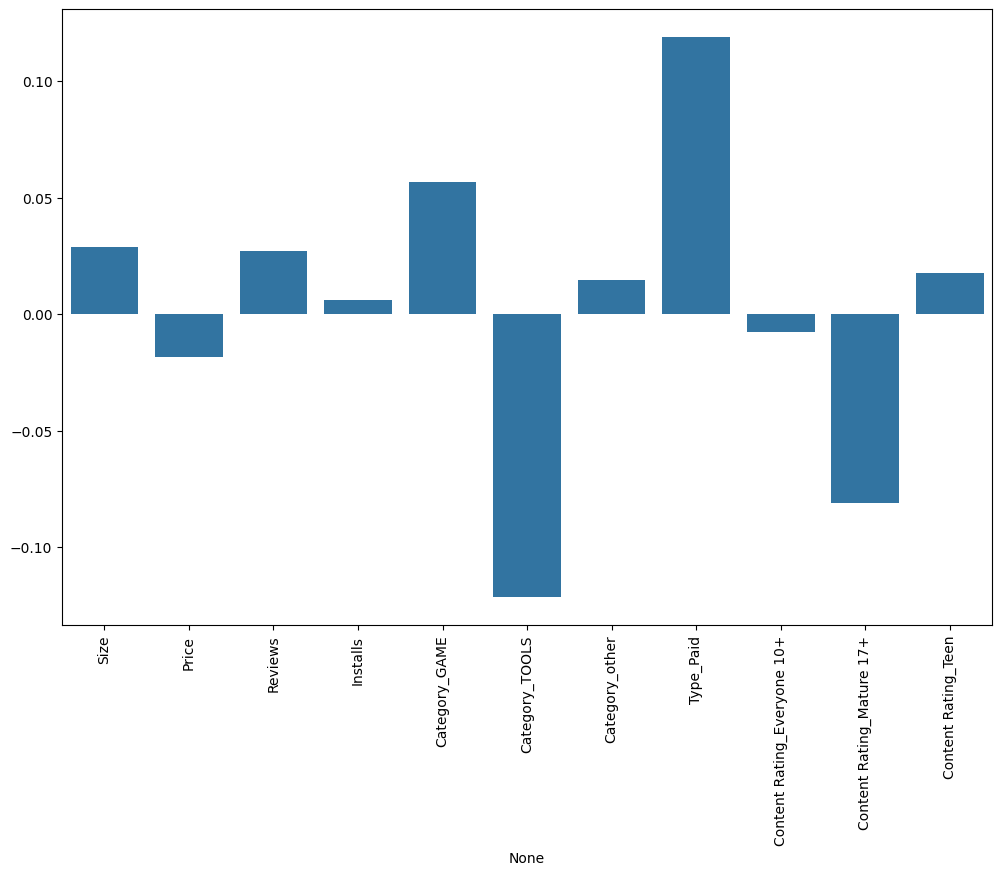

In [154]:
#
plt.figure(figsize=(12,8))
sns.barplot(x=X_train_tr.columns, y=model.coef_)
plt.xticks(rotation=90);


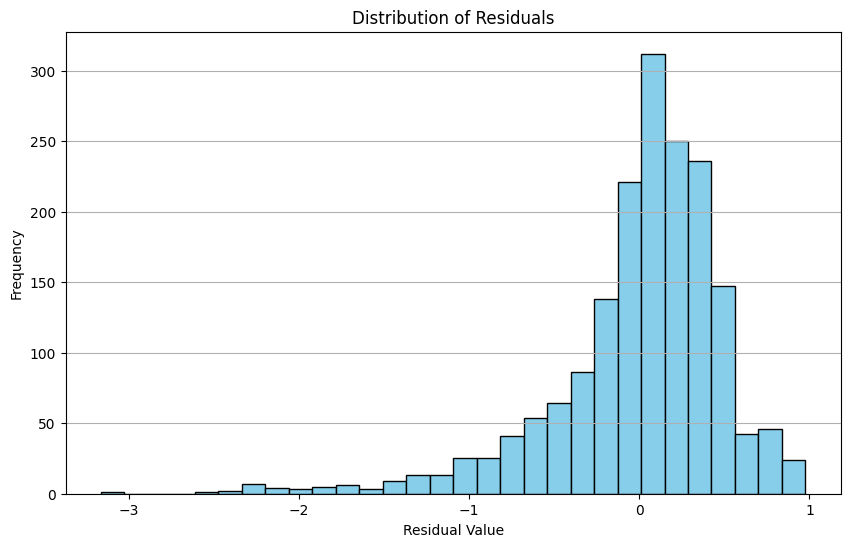

In [155]:
# Calculate residuals
residuals = y_test - y_pred

# Plot a histogram of the residual
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


The residuals (difference between actual and predicted values) are plotted to diagnose potential issues with the regression model.

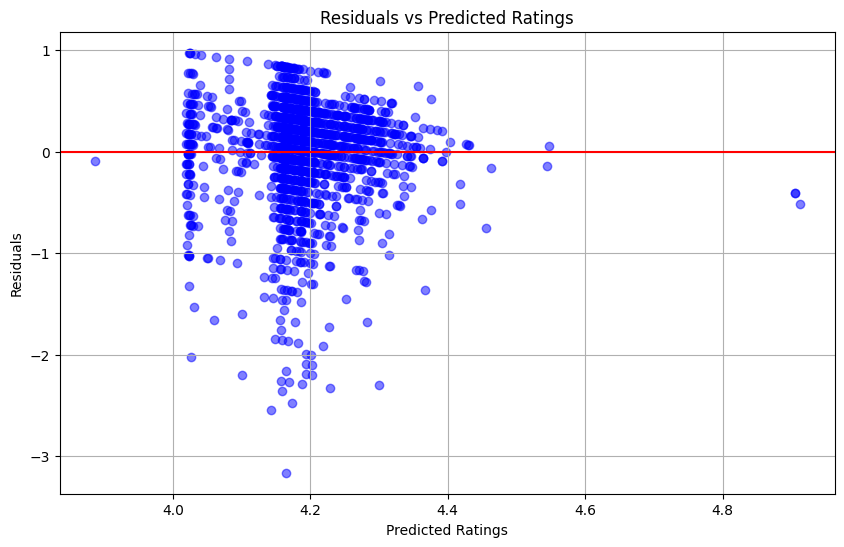

In [156]:
# Homoscedasticity

# Plot residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Predicted Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


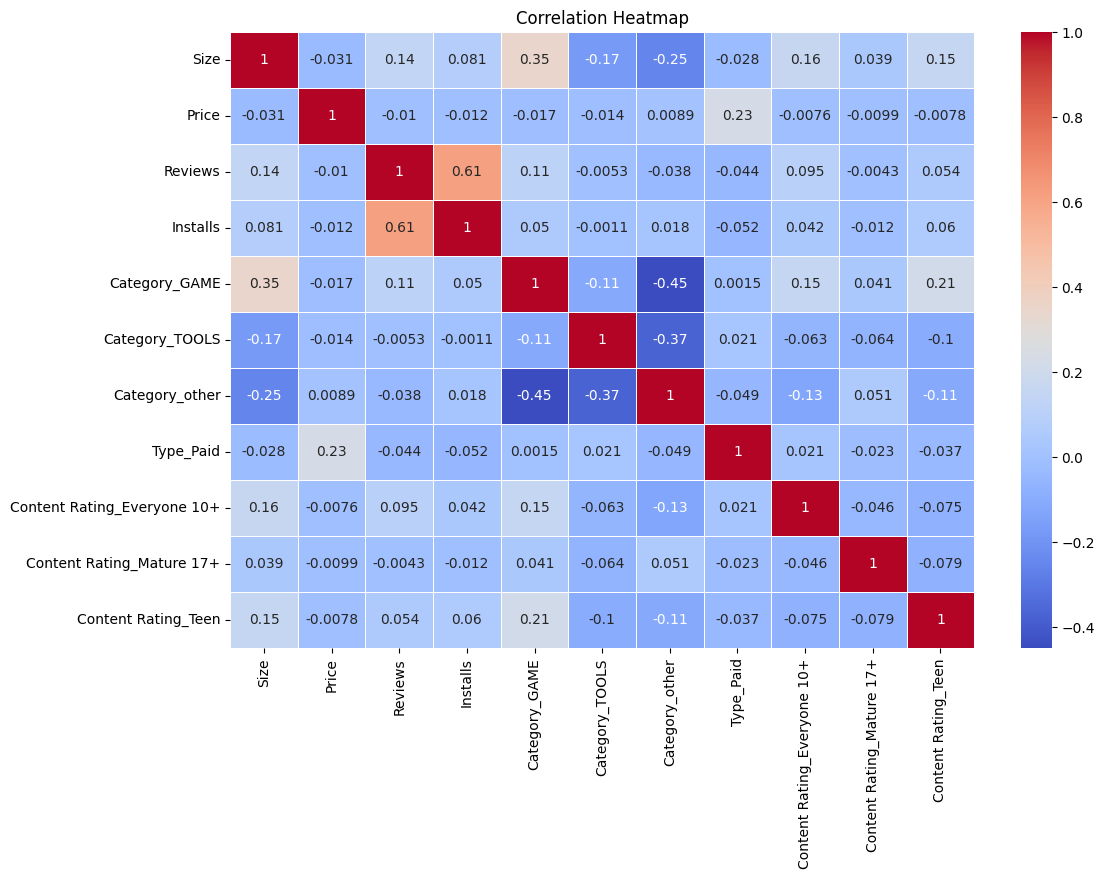

In [157]:
# Calculate the correlation for the training data
correlation = X_train_tr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Heatmap of correlations between features

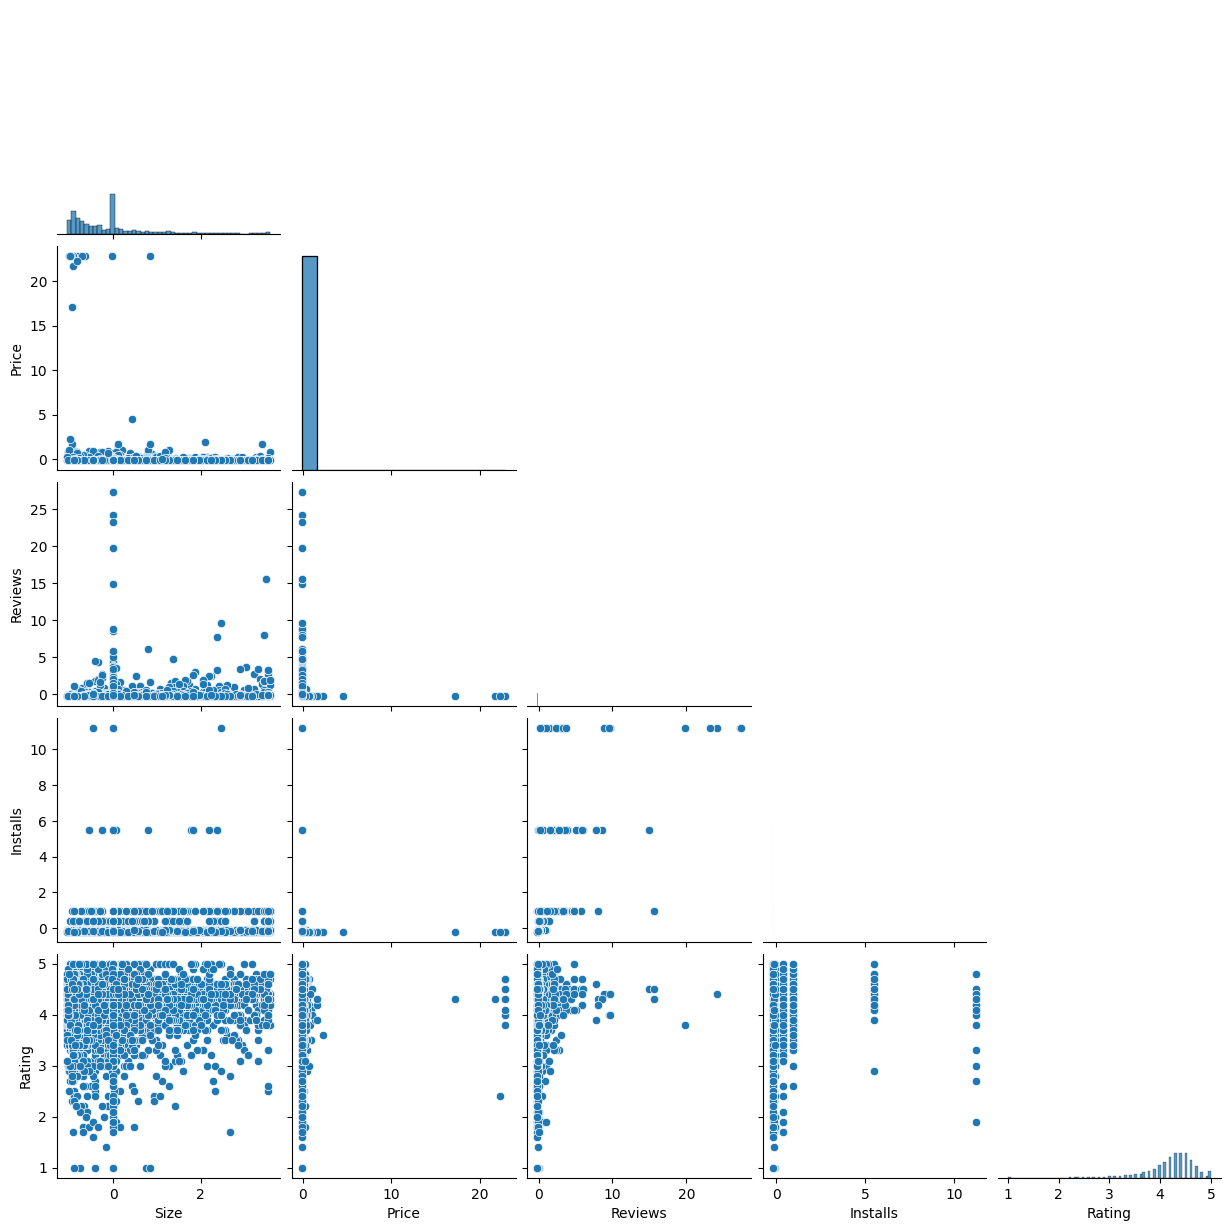

In [158]:
# Visualizes the pairwise relationships between the features 'Size', 'Price', 'Reviews', and 'Installs',
sns.pairplot(pd.concat([X_train_tr[['Size', 'Price', 'Reviews', 'Installs']], y_train], axis=1), corner=True)

In [159]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, max_depth=7, random_state=1)

# Train the model
rf_model.fit(X_train_tr, y_train)

# Predict
rf_y_pred = rf_model.predict(X_test_tr)

# Calculate R-squared for training data
print("R-squared for training data:")
print(rf_model.score(X_train_tr, y_train))

# # Calculate R-squared for testing data
print("R-squared for test data:")
print(rf_model.score(X_test_tr, y_test))

mean_absolute_error(rf_y_pred, y_test)


R-squared for training data:
0.2444192503587509
R-squared for test data:
0.17238698784458617


0.32280145503480717

### 4. Which features are most important in predicting app ratings?

Using a Random Forest Regressor model, identified the most important features that predict app ratings are number of reviews, size and installs.

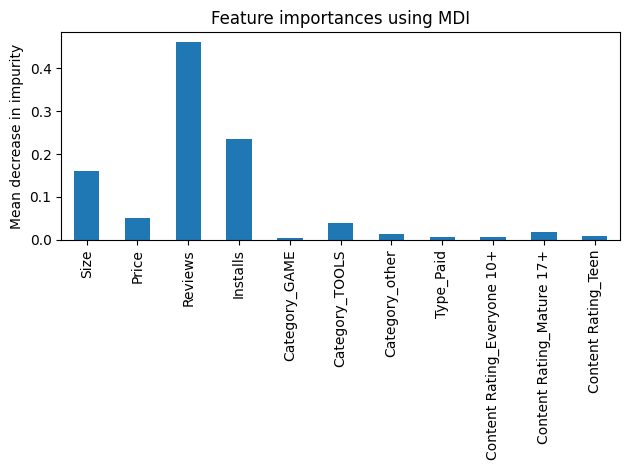

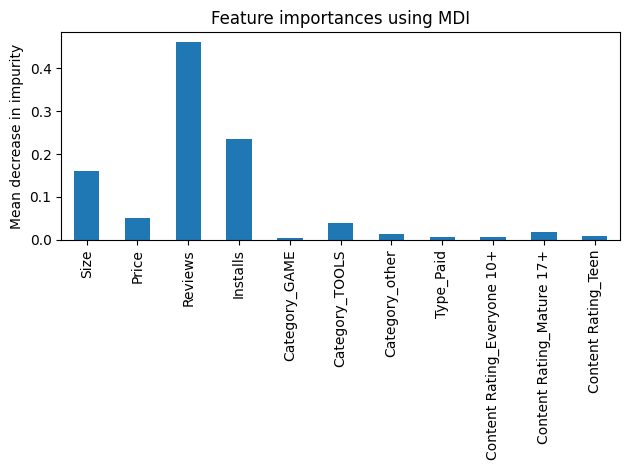

In [160]:
# Evaluate the importance of features
importances = rf_model.feature_importances_

importances = pd.Series(importances, index=X_train_tr.columns)

fig, ax = plt.subplots()
importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


# 7: Conclusion
* The Random Forest Regressor has higher R² values for both training and testing data compared to the Linear Regression Model, suggesting it's better fitting the data.

* The Random Forest Regressor has a lower MAE (0.3225) compared to the Linear Regression Model (0.3587), which means, on average, its predictions are closer to the actual values.

* With the information above we can conclude that Random Forest Regressor performs better than Linear Regression Model